In [53]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import os
import sys
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.neural_network import MLPClassifier

from ast import literal_eval

""
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

import platform
if 'Windows' in platform.platform():
    ROOT_PATH = "D:/PycharmProjects/HMAN"
else:
    ROOT_PATH = "/home/xkliu/PycharmProjects/HMAN"
RAW_DATA_PATH = ROOT_PATH  + "/raw_data"
DATA_PATH = ROOT_PATH + "/data"
os.chdir(ROOT_PATH)
sys.path.append("./")

from kddirkit.utils import utils
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from pprint import pprint

## 1. Load Data

In [2]:
track_dtype = {'track_id': int, 'album_id': int, 'album_type': str, 'artist_id': int, 'set_split': str,
               'set_subset': str, 'track_genre_top': str, 'track_genres': str, 'track_genres_all': str,
               'track_title': str}
genres_converters = {'track_genres': literal_eval, 'track_genres_all': literal_eval}
medium_data = pd.read_csv(RAW_DATA_PATH + '/medium_data.csv', converters=genres_converters)

In [3]:
medium_data_train = pd.read_csv(RAW_DATA_PATH + '/medium_data_train.csv', converters=genres_converters)
medium_data_test = pd.read_csv(RAW_DATA_PATH + '/medium_data_test.csv', converters=genres_converters)
medium_data_val = pd.read_csv(RAW_DATA_PATH + '/medium_data_val.csv', converters=genres_converters)

In [4]:
medium_instance_triple = np.load(DATA_PATH + '/' + 'medium_instance_triple.npy')
medium_instance_scope = np.load(DATA_PATH + '/' + 'medium_instance_scope.npy')
medium_label = np.load(DATA_PATH + '/' + 'medium_label.npy')

In [5]:
medium_train_instance_triple = np.load(DATA_PATH + '/' + 'medium_train_instance_triple.npy')
medium_train_instance_scope = np.load(DATA_PATH + '/' + 'medium_train_instance_scope.npy')
medium_train_label = np.load(DATA_PATH + '/' + 'medium_train_label.npy')

In [6]:
medium_val_instance_triple = np.load(DATA_PATH + '/' + 'medium_val_instance_triple.npy')
medium_val_instance_scope = np.load(DATA_PATH + '/' + 'medium_val_instance_scope.npy')
medium_val_label = np.load(DATA_PATH + '/' + 'medium_val_label.npy')

In [7]:
medium_test_entity_pair = np.load(DATA_PATH + '/' + 'medium_test_entity_pair.npy')
medium_test_entity_scope = np.load(DATA_PATH + '/' + 'medium_test_entity_scope.npy')
medium_test_label = np.load(DATA_PATH + '/' + 'medium_test_label.npy')

In [8]:
medium_label_transform = np.load(DATA_PATH + '/' + 'medium_label_transform.npy')
medium_train_label_transform = np.load(DATA_PATH + '/' + 'medium_train_label_transform.npy')
medium_val_label_transform = np.load(DATA_PATH + '/' + 'medium_val_label_transform.npy')
medium_test_label_transform = np.load(DATA_PATH + '/' + 'medium_test_label_transform.npy')
medium_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_label_bottom_transform.npy')
medium_train_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_train_label_bottom_transform.npy')
medium_val_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_val_label_bottom_transform.npy')
medium_test_label_bottom_transform = np.load(DATA_PATH + '/' + 'medium_test_label_bottom_transform.npy')

In [9]:
col_name = ['track_id', 'album_id', 'album_type', 'artist_id', 'set_split', 'set_subset', 'track_genres_top', 'track_genre', 'track_genres_all']
medium_data_train_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_train_sort.txt', sep ='-----',  skiprows =1, names  = col_name)
medium_data_val_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_VAL_sort.txt', sep = '-----',  skiprows =1, names  = col_name)
medium_data_test_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_test_sort.txt', sep = '-----', skiprows =1, names  = col_name)

C:\Users\Johan\AppData\Local\Temp\ipykernel_236352\691608824.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  medium_data_train_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_train_sort.txt', sep ='-----',  skiprows =1, names  = col_name)
C:\Users\Johan\AppData\Local\Temp\ipykernel_236352\691608824.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  medium_data_val_sort = pd.read_csv(RAW_DATA_PATH + '/' + 'medium_data_VAL_sort.txt', sep = '-----',  skiprows =1, names  = col_name)
C:\Users\Johan\AppData\Local\Temp\ipykernel_236352\691608824.py:4: ParserWarning: Falling back to the 'python' engi

In [11]:
# Load metadata and features.
tracks = utils.load(RAW_DATA_PATH + '/fma_metadata/tracks.csv')
genres = utils.load(RAW_DATA_PATH + '/fma_metadata/genres.csv')
features = utils.load(RAW_DATA_PATH + '/fma_metadata/features.csv')
echonest = utils.load(RAW_DATA_PATH + '/fma_metadata/echonest.csv')

In [13]:
medium_data_train_sort.track_id

0             2
1             5
2             3
3           134
4         10666
          ...  
19917    155297
19918    155298
19919    155306
19920    155307
19921    155314
Name: track_id, Length: 19922, dtype: int64

0             2
1             5
2             3
3           134
4         10666
          ...  
19917    155297
19918    155298
19919    155306
19920    155307
19921    155314
Name: track_id, Length: 19922, dtype: int64

In [14]:
small = tracks['set', 'subset'] <= 'medium'

train = tracks['set', 'split'] == 'training'
small = tracks['set', 'subset'] <= 'medium'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[medium_data_train_sort.track_id, ('track', 'genre_top')]
y_test = tracks.loc[medium_data_test_sort.track_id, ('track', 'genre_top')]
X_train = features.loc[medium_data_train_sort.track_id, 'mfcc']
X_test = features.loc[medium_data_test_sort.track_id, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

19922 training examples, 2573 testing examples
140 features, 16 classes


In [15]:
chroma_feature = features.loc[medium_data_train_sort.track_id, 'chroma_cens']
tonnetz_feature = features.loc[medium_data_train_sort.track_id, 'tonnetz']
mfcc_feature = features.loc[medium_data_train_sort.track_id, 'mfcc']
centroid_feature = features.loc[medium_data_train_sort.track_id, 'spectral_centroid']
bandwidth_feature = features.loc[medium_data_train_sort.track_id, 'spectral_bandwidth']
contrast_feature = features.loc[medium_data_train_sort.track_id, 'spectral_contrast']
rolloff_feature = features.loc[medium_data_train_sort.track_id, 'spectral_rolloff']
rmse_feature = features.loc[medium_data_train_sort.track_id, 'rmse']
zcr_feature = features.loc[medium_data_train_sort.track_id, 'zcr']
np.array(pd.concat([chroma_feature, tonnetz_feature, mfcc_feature, centroid_feature, bandwidth_feature, contrast_feature, rolloff_feature, rmse_feature, zcr_feature], axis = 1))

array([[ 7.18065262e+00,  5.23030901e+00,  2.49320805e-01, ...,
         0.00000000e+00,  2.08987212e+00,  6.14481084e-02],
       [ 5.27562976e-01, -7.76543170e-02, -2.79610306e-01, ...,
         0.00000000e+00,  2.19330311e+00,  4.48606014e-02],
       [ 1.88896334e+00,  7.60539293e-01,  3.45296562e-01, ...,
         0.00000000e+00,  1.71672380e+00,  6.93301633e-02],
       ...,
       [ 6.44815028e-01, -8.79404128e-01, -1.14923191e+00, ...,
         4.88281250e-03,  3.17907929e+00,  2.20229235e-02],
       [-4.46937442e-01,  1.23500383e+00, -2.50854611e-01, ...,
         1.95312500e-03,  1.99608481e+00,  4.30976301e-02],
       [-1.21936493e-01, -3.48523021e-01, -5.55810153e-01, ...,
         6.34765625e-03,  1.98907959e+00,  1.92883536e-02]])

In [16]:
mfcc_feature = features.loc[medium_data_train_sort.track_id, 'mfcc']
contrast_feature = features.loc[medium_data_train_sort.track_id, 'spectral_contrast']
bandwidth_feature = features.loc[medium_data_train_sort.track_id, 'spectral_bandwidth']
np.array(pd.concat([mfcc_feature, contrast_feature, bandwidth_feature], axis = 1))

array([[ 3.85678911e+00,  1.54190099e+00,  8.16448126e-04, ...,
         0.00000000e+00, -8.84317398e-01,  4.36808990e+02],
       [ 2.62451696e+00,  2.41529298e+00,  4.40233231e-01, ...,
         0.00000000e+00, -6.58707142e-01,  4.74413513e+02],
       [ 4.29675484e+00,  1.39997685e+00,  1.12534620e-01, ...,
         0.00000000e+00,  4.64217186e-01,  4.86662476e+02],
       ...,
       [-2.28700694e-02,  3.70875740e+00, -5.68366706e-01, ...,
         3.16722260e+02,  1.47613370e+00,  4.59323944e+02],
       [ 1.41740656e+00,  5.01407459e-02,  1.75254256e-01, ...,
         4.66960571e+02, -3.94295335e-01,  3.69119659e+02],
       [ 2.94643092e+00,  2.28863192e+00,  2.13062912e-01, ...,
         6.16539795e+02,  5.13634562e-01,  3.13371704e+02]])

In [17]:
X_train.columns

MultiIndex([('kurtosis', '01'),
            ('kurtosis', '02'),
            ('kurtosis', '03'),
            ('kurtosis', '04'),
            ('kurtosis', '05'),
            ('kurtosis', '06'),
            ('kurtosis', '07'),
            ('kurtosis', '08'),
            ('kurtosis', '09'),
            ('kurtosis', '10'),
            ...
            (     'std', '11'),
            (     'std', '12'),
            (     'std', '13'),
            (     'std', '14'),
            (     'std', '15'),
            (     'std', '16'),
            (     'std', '17'),
            (     'std', '18'),
            (     'std', '19'),
            (     'std', '20')],
           names=['statistics', 'number'], length=140)

# Evaluation

In [67]:
# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = MLPClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 50.91%


C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [55]:
results = clf.predict(X_test)
from tqdm import tqdm

r_count = 0
for z1, z2  in zip(y_test, results):
    # print(z1, z2)
    if z1 == z2:
        r_count += 1
print(r_count/len(X_test))

0.5460551884959192


C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
y_test_np = np.argmax(pd.get_dummies(y_test).to_numpy(), axis = 1).astype("int64")

y_test_np_ = np.zeros((len(y_test_np) , 16))  # 相当于 做了一个onehot_dict
y_test_np_[np.arange(len(y_test_np) ), y_test_np] = 1  # 为onehot_dict 赋值
y_test_np_

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [57]:
results_prob = clf.predict_proba(X_test)
results_prob

C:\Users\Johan\anaconda3\envs\HMAN\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[6.98081275e-09, 1.22424443e-17, 1.12212066e-07, ...,
        2.21103619e-01, 3.11862217e-12, 2.46681583e-10],
       [1.11801100e-08, 3.58768911e-10, 1.05973468e-08, ...,
        1.73307306e-01, 5.59349763e-06, 5.35490461e-06],
       [8.18018011e-09, 3.73084295e-12, 1.23393335e-08, ...,
        4.90418426e-04, 6.42134922e-04, 1.53156673e-07],
       ...,
       [9.92486261e-06, 5.29549518e-11, 8.73207566e-09, ...,
        4.26414109e-02, 2.80073864e-04, 1.82266866e-09],
       [1.34481015e-09, 5.54713202e-11, 2.21088125e-09, ...,
        9.67149399e-01, 3.10985437e-07, 1.38886279e-10],
       [3.50293846e-06, 7.12610523e-12, 3.22214234e-08, ...,
        4.05180894e-01, 6.09264650e-07, 1.87289145e-13]])

In [64]:
y_label_ = np.zeros((len(y_test_np), 16))
y_label_[np.arange(len(y_test_np)), y_test_np] = 1
y_label_

exclude_na_flatten_label = y_label_.reshape(-1)

In [65]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

auc = average_precision_score(exclude_na_flatten_label,results_prob.reshape(-1))
auc

0.5638082697966763

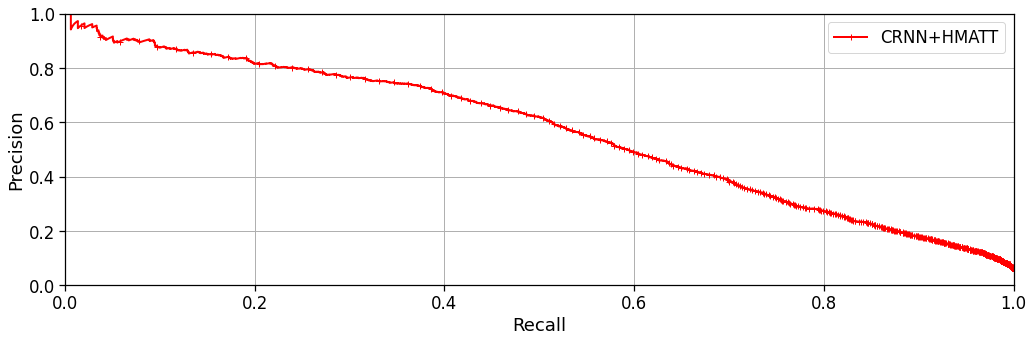

In [68]:

precision,recall,threshold = precision_recall_curve(y_test_np_.reshape(-1),results_prob.reshape(-1))
plt.plot(recall[:], precision[:], "r", marker="+", markevery=60, lw=2, label="CRNN+HMATT")



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.xlim([0.0, 1])
# plt.title('Precision-Recall Area={0:1.4f}'.format(auc))
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [71]:
y_test_np_.reshape(-1).shape

(41168,)